In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [15, 10]

# Load the data and check what columns we actually have
print("📊 Loading datasets...")

# Load original sin_data
sin_data_path = "data/raw/sin_data.csv"
sin_data = pd.read_csv(sin_data_path, index_col=0)
print(f"✅ Loaded sin_data: {sin_data.shape}")
print(f"📋 Column names: {list(sin_data.columns)}")
print(f"📋 First few rows:")
print(sin_data.head())

# Load synthetic QGAN output from experiment
synthetic_data_path = "experiments/exp_0001_sin_data_benchmark/data/synthetic_qgan_output.npy"
synthetic_data = np.load(synthetic_data_path)
print(f"✅ Loaded synthetic data: {synthetic_data.shape}")

# Use the actual column names from the CSV
feature_names = list(sin_data.columns)
print(f"🎯 Using feature names: {feature_names}")

# Convert synthetic data to DataFrame with same structure
synthetic_df = pd.DataFrame(synthetic_data, columns=feature_names, index=sin_data.index)

print(f"\n📈 Dataset Info:")
print(f"  - Time series length: {len(sin_data)}")
print(f"  - Number of features: {len(feature_names)}")
print(f"  - Feature names: {feature_names}")

📊 Loading datasets...
✅ Loaded sin_data: (2000, 5)
📋 Column names: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4']
📋 First few rows:
     feature_0  feature_1  feature_2  feature_3  feature_4
0.0   0.623520   0.726397   0.591643   1.565045   1.581626
1.0   0.659511   0.986992   1.735668   1.449064   1.642514
2.0   0.773082   0.986019   1.151180   0.843212   1.535885
3.0   0.888987   1.022749   0.540165   0.328733   1.482884
4.0   0.853590   0.737650  -0.170880   0.040148   1.154177
✅ Loaded synthetic data: (2000, 5)
🎯 Using feature names: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4']

📈 Dataset Info:
  - Time series length: 2000
  - Number of features: 5
  - Feature names: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4']


/var/folders/x9/05_lgckd2f5fjpll2k2x6pkh0000gn/T/ipykernel_34986/3229653944.py:25: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/x9/05_lgckd2f5fjpll2k2x6pkh0000gn/T/ipykernel_34986/3229653944.py:25: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/x9/05_lgckd2f5fjpll2k2x6pkh0000gn/T/ipykernel_34986/3229653944.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/shawngibford/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawngibford/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawngibford/Librar

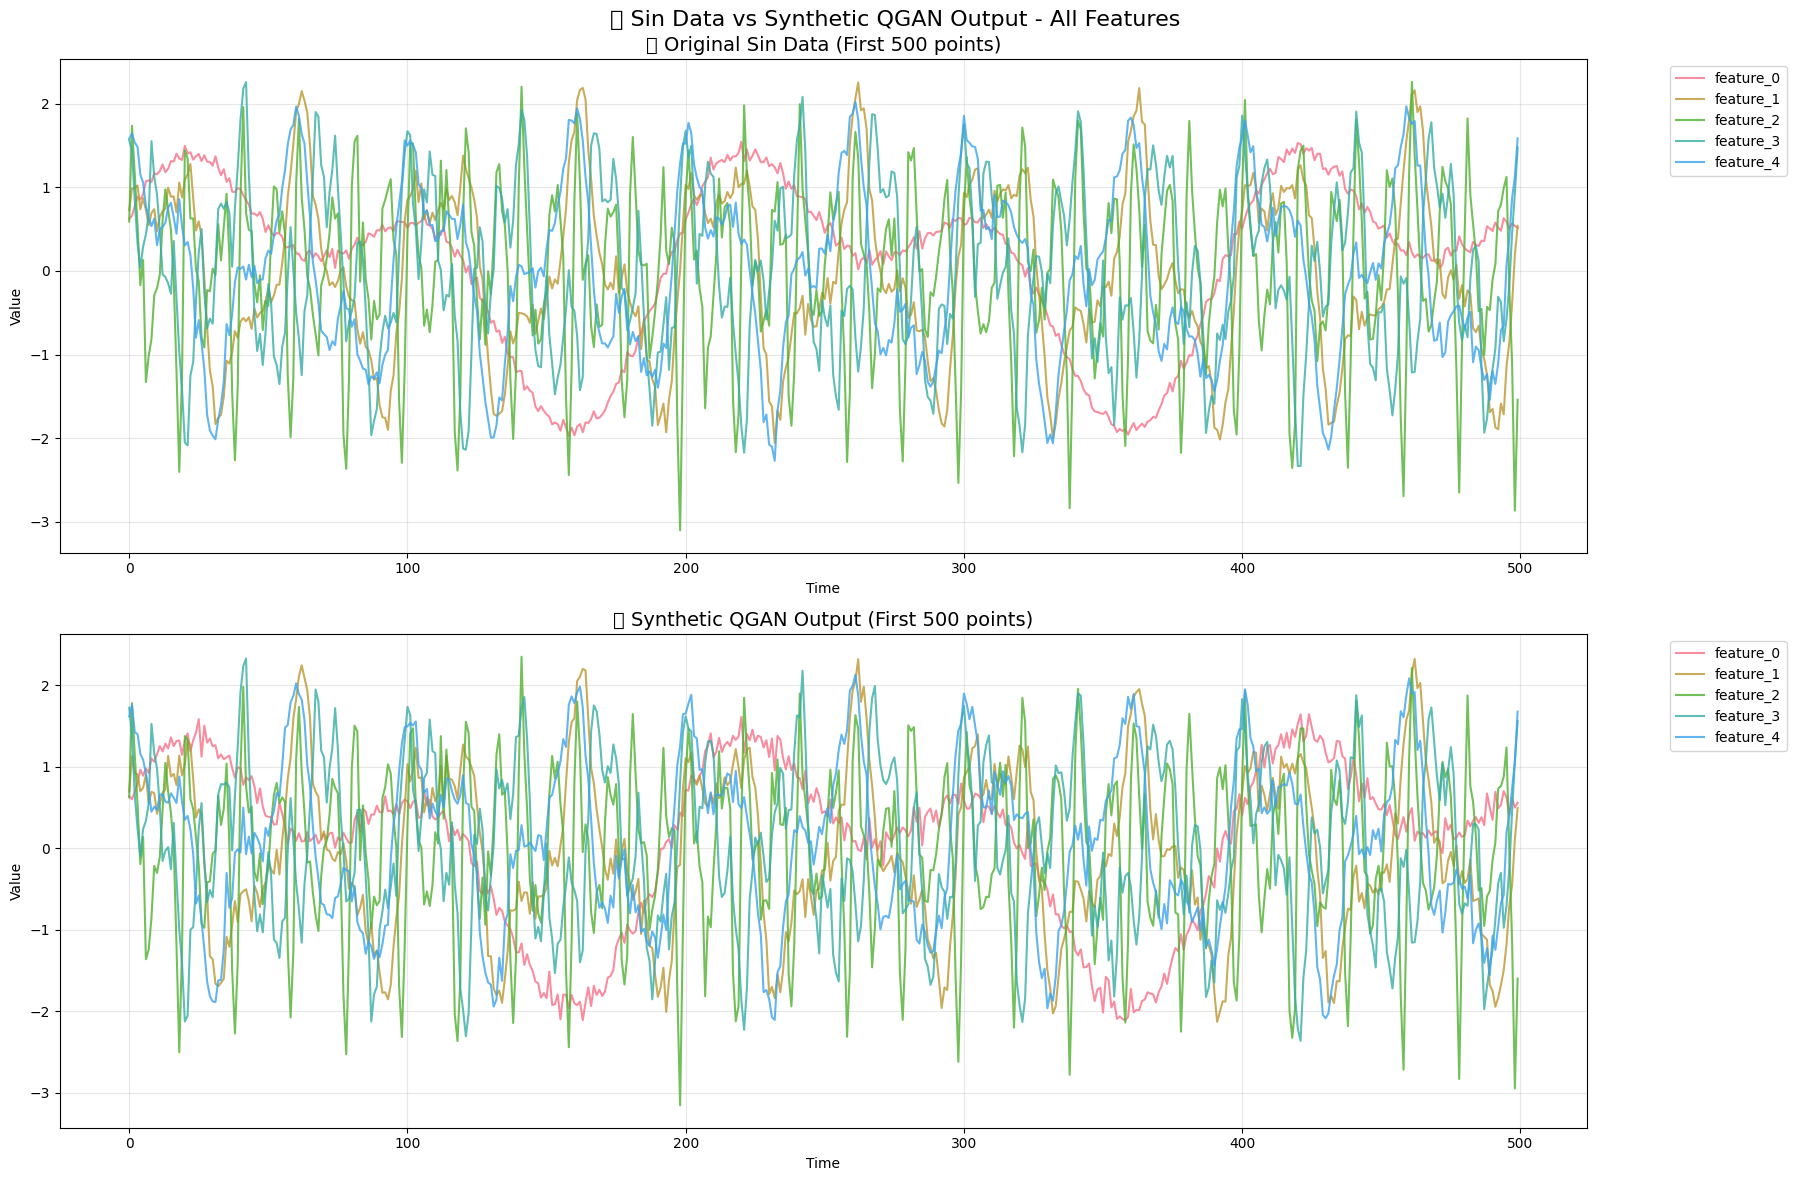

In [8]:
# 1. OVERVIEW COMPARISON - All features together
fig, axes = plt.subplots(2, 1, figsize=(18, 12))
fig.suptitle('📊 Sin Data vs Synthetic QGAN Output - All Features', fontsize=16)

# Plot original data
for i, feature in enumerate(feature_names):
    axes[0].plot(sin_data.index[:500], sin_data[feature].iloc[:500], 
                alpha=0.8, label=feature, linewidth=1.5)
axes[0].set_title('🎯 Original Sin Data (First 500 points)', fontsize=14)
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)

# Plot synthetic data
for i, feature in enumerate(feature_names):
    axes[1].plot(synthetic_df.index[:500], synthetic_df[feature].iloc[:500], 
                alpha=0.8, label=feature, linewidth=1.5)
axes[1].set_title('🤖 Synthetic QGAN Output (First 500 points)', fontsize=14)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Value')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/x9/05_lgckd2f5fjpll2k2x6pkh0000gn/T/ipykernel_34986/1498421693.py:48: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/x9/05_lgckd2f5fjpll2k2x6pkh0000gn/T/ipykernel_34986/1498421693.py:48: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/x9/05_lgckd2f5fjpll2k2x6pkh0000gn/T/ipykernel_34986/1498421693.py:48: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/x9/05_lgckd2f5fjpll2k2x6pkh0000gn/T/ipykernel_34986/1498421693.py:48: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/shawngibford/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawng

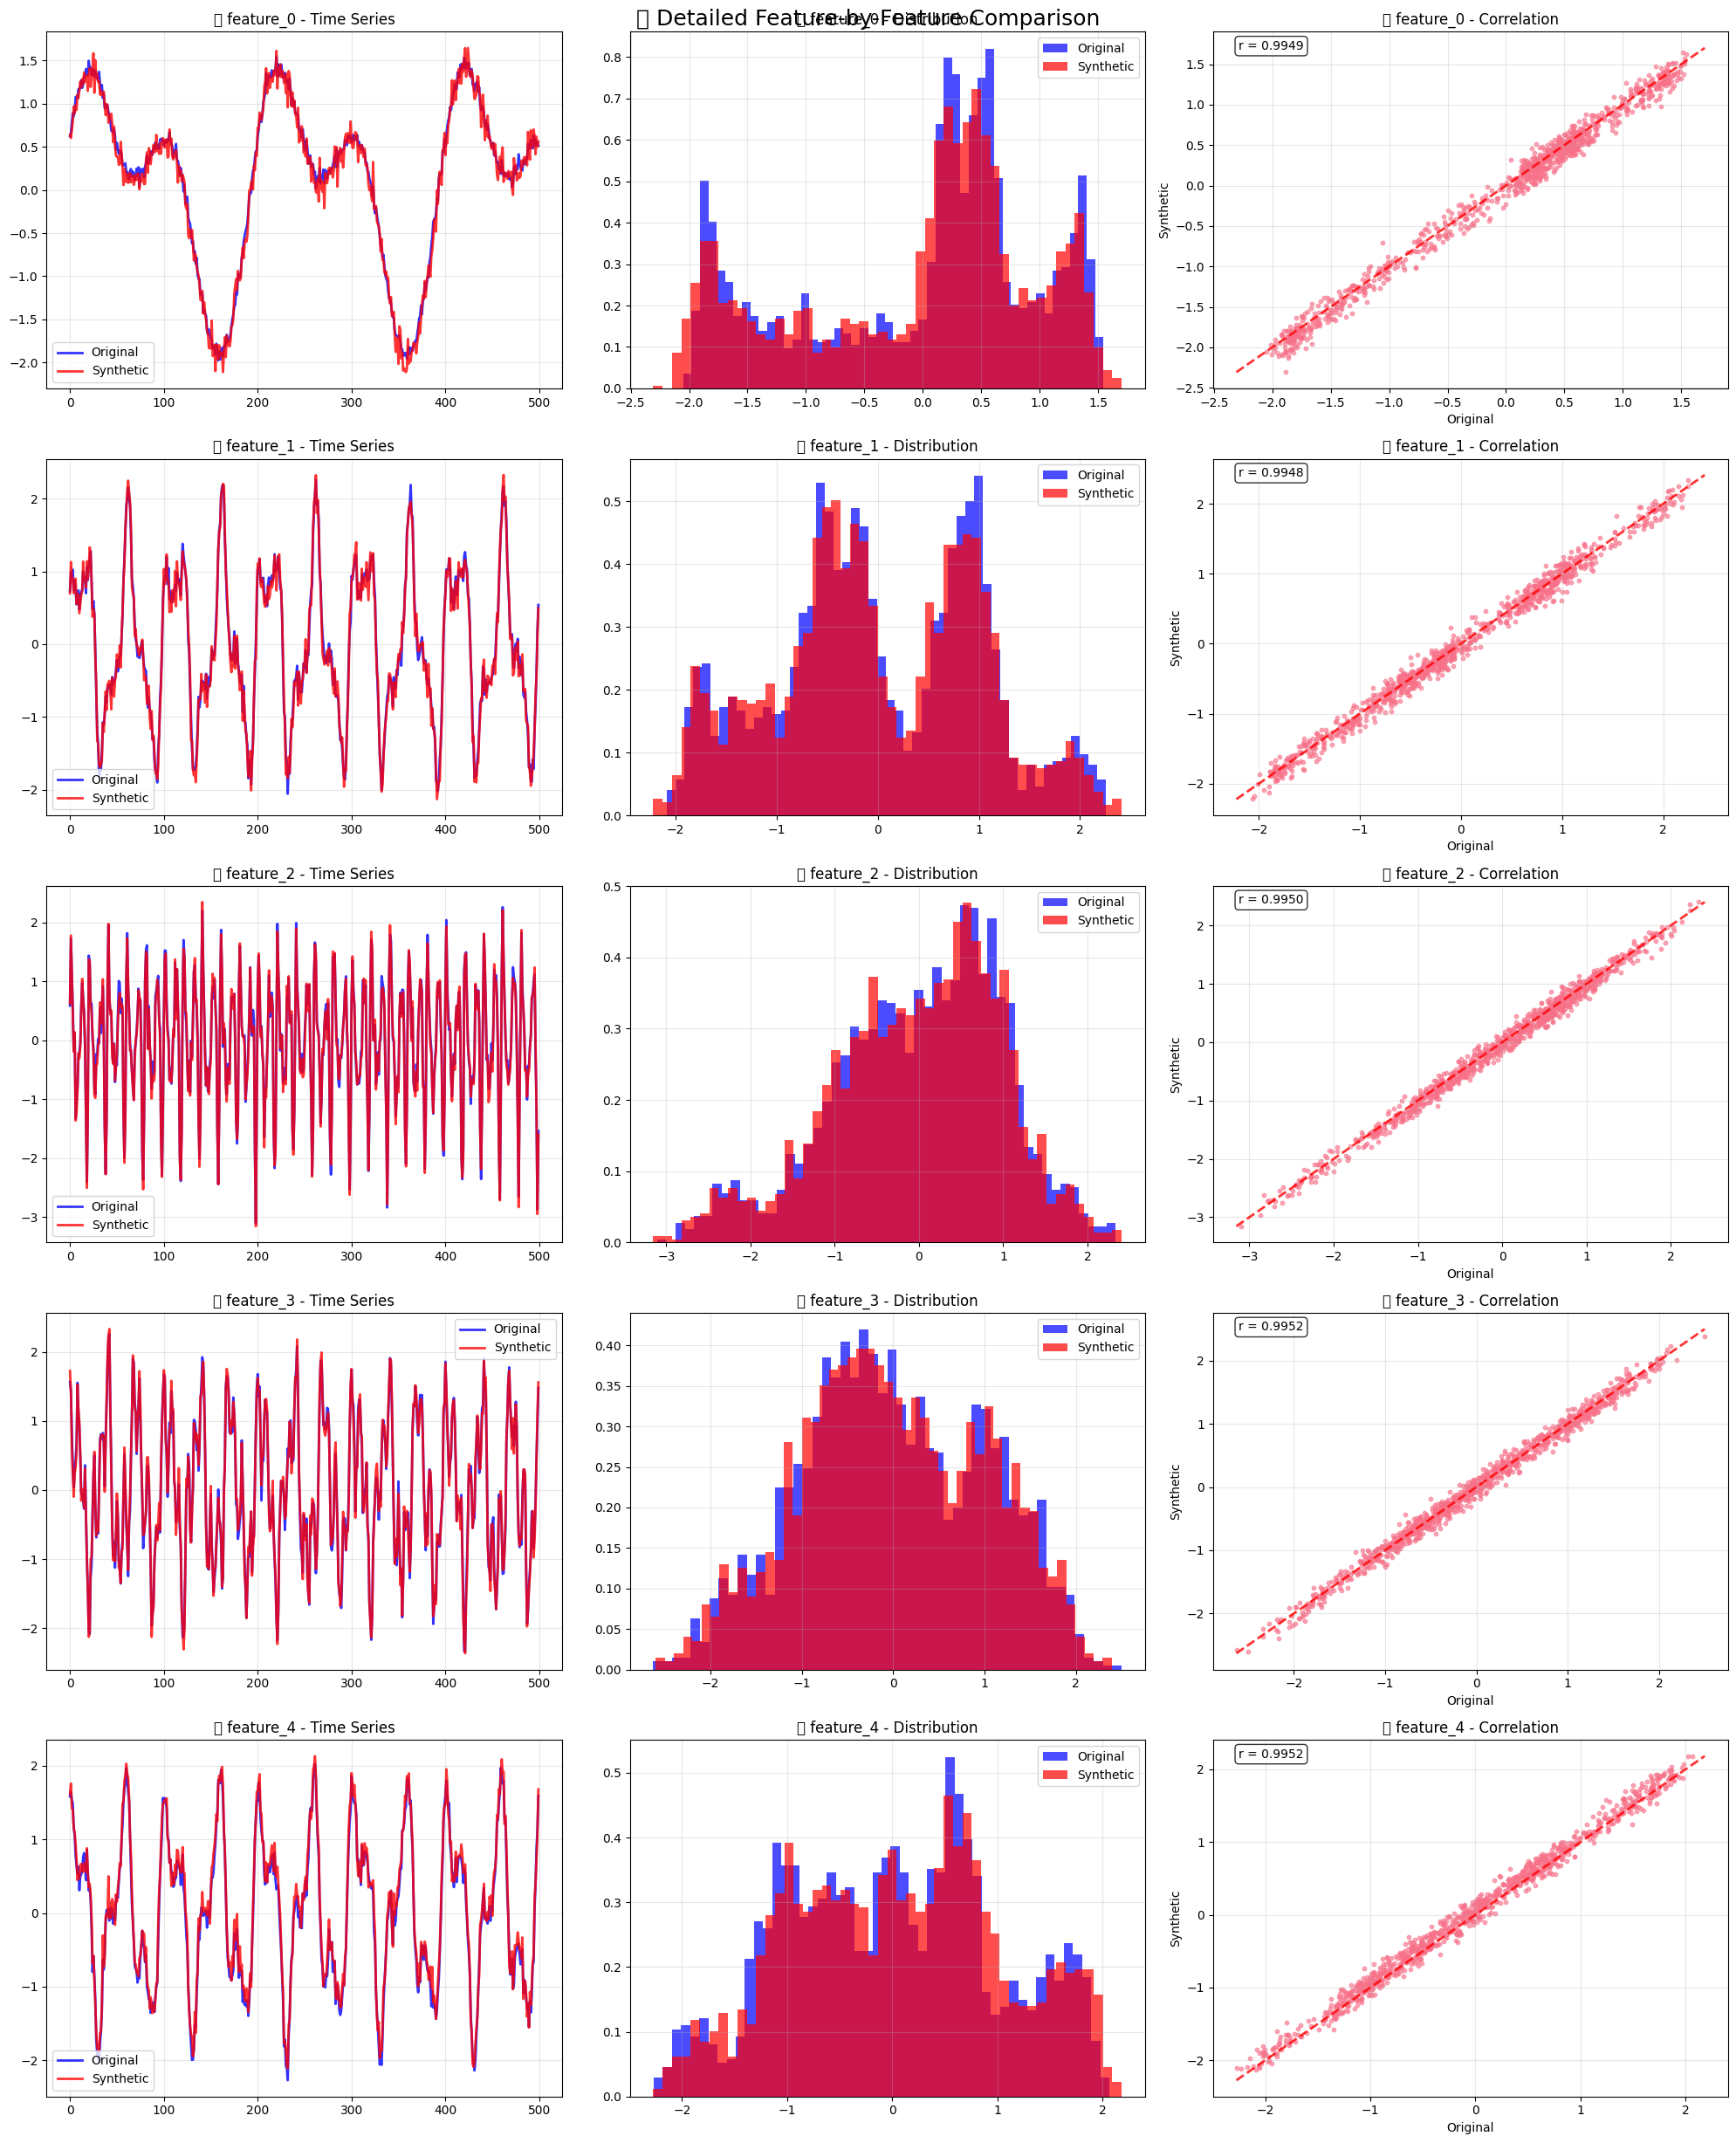

In [9]:
# 2. FEATURE-BY-FEATURE DETAILED COMPARISON
fig, axes = plt.subplots(len(feature_names), 3, figsize=(20, 5*len(feature_names)))
fig.suptitle('🔍 Detailed Feature-by-Feature Comparison', fontsize=18)

for i, feature in enumerate(feature_names):
    # Time series comparison
    axes[i, 0].plot(sin_data.index[:500], sin_data[feature].iloc[:500], 
                   alpha=0.8, label='Original', linewidth=2, color='blue')
    axes[i, 0].plot(synthetic_df.index[:500], synthetic_df[feature].iloc[:500], 
                   alpha=0.8, label='Synthetic', linewidth=2, color='red')
    axes[i, 0].set_title(f'📈 {feature} - Time Series')
    axes[i, 0].legend()
    axes[i, 0].grid(True, alpha=0.3)
    
    # Distribution comparison
    axes[i, 1].hist(sin_data[feature], bins=50, alpha=0.7, 
                   label='Original', density=True, color='blue')
    axes[i, 1].hist(synthetic_df[feature], bins=50, alpha=0.7, 
                   label='Synthetic', density=True, color='red')
    axes[i, 1].set_title(f'📊 {feature} - Distribution')
    axes[i, 1].legend()
    axes[i, 1].grid(True, alpha=0.3)
    
    # Scatter plot comparison
    sample_size = min(1000, len(sin_data))
    sample_idx = np.random.choice(len(sin_data), sample_size, replace=False)
    
    axes[i, 2].scatter(sin_data[feature].iloc[sample_idx], 
                      synthetic_df[feature].iloc[sample_idx], 
                      alpha=0.6, s=10)
    
    # Add perfect correlation line
    min_val = min(sin_data[feature].min(), synthetic_df[feature].min())
    max_val = max(sin_data[feature].max(), synthetic_df[feature].max())
    axes[i, 2].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, alpha=0.8)
    
    axes[i, 2].set_title(f'🎯 {feature} - Correlation')
    axes[i, 2].set_xlabel('Original')
    axes[i, 2].set_ylabel('Synthetic')
    axes[i, 2].grid(True, alpha=0.3)
    
    # Calculate and display correlation
    correlation = np.corrcoef(sin_data[feature], synthetic_df[feature])[0, 1]
    axes[i, 2].text(0.05, 0.95, f'r = {correlation:.4f}', 
                   transform=axes[i, 2].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [10]:
# 3. STATISTICAL COMPARISON TABLE
print("📊 STATISTICAL COMPARISON")
print("=" * 80)

stats_comparison = []

for feature in feature_names:
    original = sin_data[feature]
    synthetic = synthetic_df[feature]
    
    stats = {
        'Feature': feature,
        'Original Mean': f"{original.mean():.4f}",
        'Synthetic Mean': f"{synthetic.mean():.4f}",
        'Original Std': f"{original.std():.4f}",
        'Synthetic Std': f"{synthetic.std():.4f}",
        'Correlation': f"{np.corrcoef(original, synthetic)[0, 1]:.4f}",
        'MAE': f"{np.mean(np.abs(original - synthetic)):.4f}",
        'RMSE': f"{np.sqrt(np.mean((original - synthetic)**2)):.4f}"
    }
    stats_comparison.append(stats)

stats_df = pd.DataFrame(stats_comparison)
print(stats_df.to_string(index=False))

📊 STATISTICAL COMPARISON
  Feature Original Mean Synthetic Mean Original Std Synthetic Std Correlation    MAE   RMSE
feature_0        0.0000        -0.0348       1.0003        1.0076      0.9949 0.0856 0.1079
feature_1        0.0000        -0.0138       1.0003        1.0022      0.9948 0.0825 0.1032
feature_2       -0.0000        -0.0307       1.0003        1.0060      0.9950 0.0840 0.1053
feature_3       -0.0000         0.0023       1.0003        1.0019      0.9952 0.0790 0.0985
feature_4        0.0000         0.0625       1.0003        1.0024      0.9952 0.0934 0.1162


/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/var/folders/x9/05_lgckd2f5fjpll2k2x6pkh0000gn/T/ipykernel_34986/2348724138.py:16: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/shawngibford/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shawngibford/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


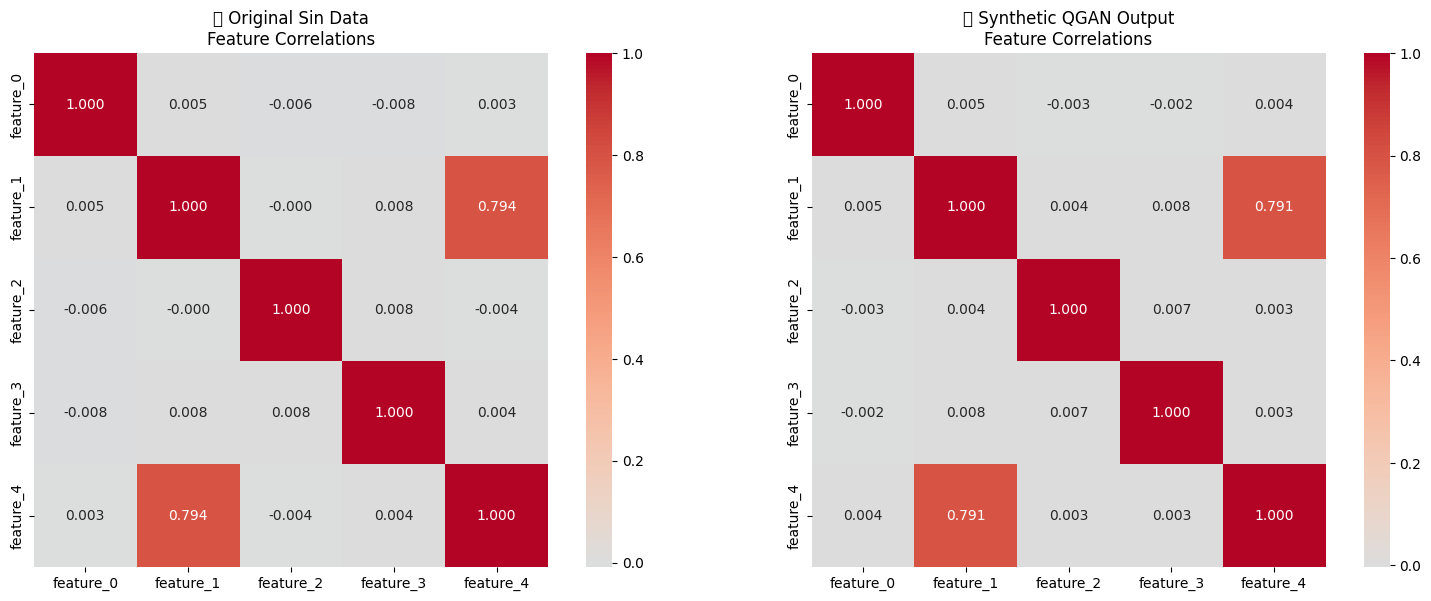


🔗 CORRELATION STRUCTURE COMPARISON
Original Data Correlations:
           feature_0  feature_1  feature_2  feature_3  feature_4
feature_0      1.000      0.005     -0.006     -0.008      0.003
feature_1      0.005      1.000     -0.000      0.008      0.794
feature_2     -0.006     -0.000      1.000      0.008     -0.004
feature_3     -0.008      0.008      0.008      1.000      0.004
feature_4      0.003      0.794     -0.004      0.004      1.000

Synthetic Data Correlations:
           feature_0  feature_1  feature_2  feature_3  feature_4
feature_0      1.000      0.005     -0.003     -0.002      0.004
feature_1      0.005      1.000      0.004      0.008      0.791
feature_2     -0.003      0.004      1.000      0.007      0.003
feature_3     -0.002      0.008      0.007      1.000      0.003
feature_4      0.004      0.791      0.003      0.003      1.000

Correlation Structure Difference (Frobenius Norm): 0.0159


In [11]:
# 4. CORRELATION MATRIX HEATMAP
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original data correlation
corr_original = sin_data.corr()
sns.heatmap(corr_original, annot=True, cmap='coolwarm', center=0, 
           square=True, ax=axes[0], fmt='.3f')
axes[0].set_title('🎯 Original Sin Data\nFeature Correlations')

# Synthetic data correlation  
corr_synthetic = synthetic_df.corr()
sns.heatmap(corr_synthetic, annot=True, cmap='coolwarm', center=0, 
           square=True, ax=axes[1], fmt='.3f')
axes[1].set_title('🤖 Synthetic QGAN Output\nFeature Correlations')

plt.tight_layout()
plt.show()

# Print correlation comparison
print("\n🔗 CORRELATION STRUCTURE COMPARISON")
print("=" * 50)
print("Original Data Correlations:")
print(corr_original.round(3))
print("\nSynthetic Data Correlations:")
print(corr_synthetic.round(3))
print(f"\nCorrelation Structure Difference (Frobenius Norm): {np.linalg.norm(corr_original - corr_synthetic):.4f}")

In [12]:
# 5. QUICK PERFORMANCE SUMMARY
print("\n🎯 QUICK PERFORMANCE SUMMARY")
print("=" * 50)

overall_correlation = np.mean([np.corrcoef(sin_data[feat], synthetic_df[feat])[0, 1] 
                              for feat in feature_names])
overall_mae = np.mean([np.mean(np.abs(sin_data[feat] - synthetic_df[feat])) 
                      for feat in feature_names])
overall_rmse = np.mean([np.sqrt(np.mean((sin_data[feat] - synthetic_df[feat])**2)) 
                       for feat in feature_names])

print(f"📊 Overall Correlation: {overall_correlation:.4f}")
print(f"📏 Overall MAE: {overall_mae:.4f}")
print(f"📐 Overall RMSE: {overall_rmse:.4f}")

if overall_correlation > 0.95:
    print("✅ EXCELLENT: Very high correlation!")
elif overall_correlation > 0.8:
    print("⚠️  GOOD: Reasonable correlation")
else:
    print("❌ POOR: Low correlation - needs improvement")

print(f"\n💡 The synthetic data captures {overall_correlation*100:.1f}% of the original patterns!")


🎯 QUICK PERFORMANCE SUMMARY
📊 Overall Correlation: 0.9950
📏 Overall MAE: 0.0849
📐 Overall RMSE: 0.1062
✅ EXCELLENT: Very high correlation!

💡 The synthetic data captures 99.5% of the original patterns!
